In [10]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Create a DataFrame with 'date' and 'value' columns
df = pd.DataFrame({'date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-02'],
                   'value': [1, 2, 3, 4, 5]})

# Calculate the threshold values for each date
thresholds = df.groupby('date')['value'].quantile([0.05, 0.95], interpolation='nearest').unstack()

# Filter the DataFrame based on the thresholds for each date
filtered_df = df[df.apply(lambda row: row['value'] >= thresholds.loc[row['date'], 0.95] or
                          row['value'] <= thresholds.loc[row['date'], 0.05], axis=1)]

# Calculate the sum of the filtered values for each date
sums = filtered_df.groupby('date')['value'].sum()


In [4]:
df

,date,value
0,2023-01-01,1
1,2023-01-01,2
2,2023-01-02,3
3,2023-01-02,4
4,2023-01-02,5


In [7]:
df.groupby('date')['value'].quantile([0.05, 0.95], interpolation='nearest').unstack()

,0.05,0.95
date,,
2023-01-01,1,2
2023-01-02,3,5


In [8]:
filtered_df

,date,value
0,2023-01-01,1
1,2023-01-01,2
2,2023-01-02,3
4,2023-01-02,5


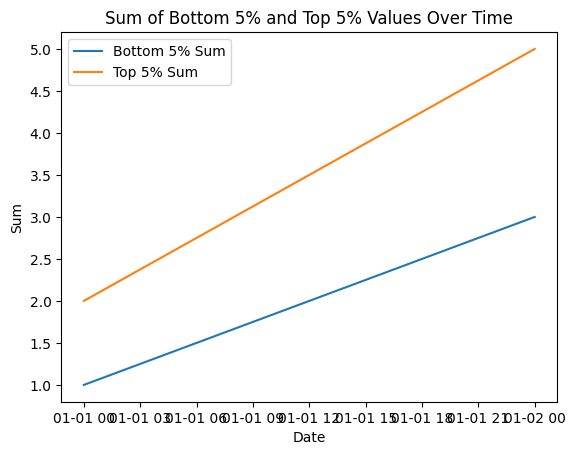

In [11]:
# Create a DataFrame with 'date' and 'value' columns
df = pd.DataFrame({'date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-02'],
                   'value': [1, 2, 3, 4, 5]})

# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Calculate the threshold values for each date without interpolation
thresholds = df.groupby('date')['value'].quantile([0.05, 0.95], interpolation='nearest').unstack()

In [17]:
thresholds


,0.05,0.95
date,,
2023-01-01,1,2
2023-01-02,3,5


In [21]:
df2 = df.merge(thresholds.reset_index(), on=['date'], how='left')


In [30]:
df2.loc[df2['value'] <= df2[0.05]].groupby('date')['value'].sum()

date
2023-01-01    1
2023-01-02    3
Name: value, dtype: int64

In [26]:
df2

,date,value,0.05,0.95
0,2023-01-01,1,1,2
1,2023-01-01,2,1,2
2,2023-01-02,3,3,5
3,2023-01-02,4,3,5
4,2023-01-02,5,3,5


In [ ]:
# Filter the DataFrame based on the thresholds for each date
filtered_df_bottom = df[df.apply(lambda row: row['value'] <= thresholds.loc[row['date'], 0.05], axis=1)]
filtered_df_top = df[df.apply(lambda row: row['value'] >= thresholds.loc[row['date'], 0.95], axis=1)]

# Calculate the sum of the filtered values for each date
bottom_5_percent_sum = filtered_df_bottom.groupby('date')['value'].sum()
top_5_percent_sum = filtered_df_top.groupby('date')['value'].sum()

# Create a new DataFrame to combine the results
result_df = pd.DataFrame({'Bottom 5% Sum': bottom_5_percent_sum, 'Top 5% Sum': top_5_percent_sum})

# Plot the data as time series
plt.plot(result_df.index, result_df['Bottom 5% Sum'], label='Bottom 5% Sum')
plt.plot(result_df.index, result_df['Top 5% Sum'], label='Top 5% Sum')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Sum of Bottom 5% and Top 5% Values Over Time')
plt.legend()
plt.show()

In [1]:
if 1<= 5 <= 10:
    print('yes')

yes


In [12]:
thresholds


,0.05,0.95
date,,
2023-01-01,1,2
2023-01-02,3,5


In [13]:
filtered_df_bottom.index = thresholds.index

In [16]:
result_df


,Bottom 5% Sum,Top 5% Sum
date,,
2023-01-01,1,2
2023-01-02,3,5
